In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('input/hoopcam.csv')

In [3]:
sum(df['ActionsFound'].isnull()) / df.shape[0] * 100

5.962441314553991

In [4]:
print(df.shape)
df = df.dropna(); df.shape

(2130, 3)


(2003, 3)

In [5]:
actions_list = ['JS', 'D', 'C', 'L', 'BTL', 'BTB', 'SM', 'HS', 'None']

def clean_actions(actions):
    if type(actions) == str:
        actions = actions.strip(' ')
        actions = actions.replace('l', '|')
        actions = actions.replace('\\', '|')
        actions = actions.replace('BTTL', 'BTL')
        actions = actions.replace('TBL', 'BTL')
        actions = actions.replace('NONE', 'None')
    return actions

In [6]:
df['ActionsFound'] = df['ActionsFound'].apply(clean_actions)

In [7]:
from collections import defaultdict
action_count = defaultdict(int)
for actions in df['ActionsFound']:
    if type(actions) == float:
        action_count['NaN'] += 1
        continue
    for action in actions.split('|'):
        action_count[action] +=  1

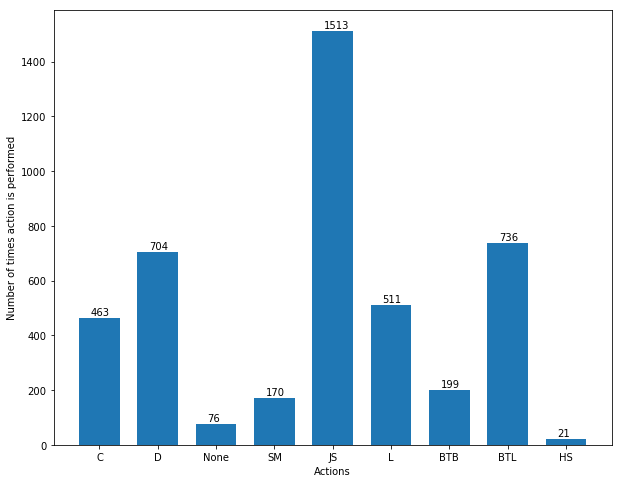

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

values = list()
keys = list()
for key in action_count.keys():
    keys.append(key)
    values.append(action_count[key])
plt.figure(figsize=(10, 8))
plt.bar(range(len(values)), values, width=0.7)
plt.xticks(range(len(keys)), keys)
plt.ylabel('Number of times action is performed')
plt.xlabel('Actions')
for x, y in enumerate(values):
    plt.text(x-0.15, y+10, y)
plt.savefig('input/action_count.jpeg')
plt.show()

In [9]:
for actions, file in zip(df['ActionsFound'], df['Path']):
    if type(actions) == float:
        continue
    for action in actions.split('|'):
        if action not in actions_list:
            print(action, file)